# Analysis

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [ ]:
#we have to translate all german, chinese or reviews written in any other language into English - run just one - otherwise you might have to resyart the kernel
!pip install langdetect googletrans==4.0.0-rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=073459a8c67afc35f043032113d1301fe014d0caabb2ec1921fd9c248ac0e99c
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
  Created wheel f

In [ ]:
import csv
import nltk
import re
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import normalize
from nltk.corpus import reuters, wordnet, stopwords
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Influenster Reviews.csv to Influenster Reviews.csv


In [ ]:
reviews = pd.read_csv("Influenster Reviews.csv")
print("Number of rows : ",len(reviews))
reviews.head()

Number of rows :  5000


,product_name,user_rating,product_review
0,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,the scent is just great it's just unbelievable...
1,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,Me deja mi cabello con una textura super suave...
2,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I love it because it leaves a shine in the hai...
3,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I have been using this since I was in middle s...
4,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I’ve used this for years! Awesome scent that s...


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Influenster Product Descriptions.csv to Influenster Product Descriptions.csv


In [ ]:
products = pd.read_csv("Influenster Product Descriptions.csv")
print("Number of rows : ",len(products))
products.head()

Number of rows :  100


,URL,Product Name,Product Description,Average Rating,Number of Reviews
0,https://www.influenster.com/reviews/garnier-sl...,Garnier Sleek & Shine Intensely Smooth Leave-I...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090
1,https://www.influenster.com/reviews/head-shoul...,Head & Shoulders Classic Clean Anti-Dandruff S...,Head & Shoulders® Classic Clean Shampoo is par...,4.22,18437
2,https://www.influenster.com/reviews/pantene-da...,Pantene Daily Moisture Renewal Shampoo,Daily Moisture Renewal Shampoo,4.26,16833
3,https://www.influenster.com/reviews/tresemme-s...,Tresemme Silky & Smooth Shampoo for Frizzy Hair,"Looking for that high glam, smooth look? TRESe...",4.30,14193
4,https://www.influenster.com/reviews/pantene-pr...,Pantene Pro-V Smooth & Sleek Shampoo & Conditi...,Smooth things over with this frizz-fighting co...,4.32,13372


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving influenster_product_desc - Copy (1).csv to influenster_product_desc - Copy (1).csv


In [ ]:
products_price = pd.read_csv("influenster_product_desc - Copy (1).csv")
print("Number of rows : ",len(products_price))
products_price.head()

Number of rows :  100


,Product Name,product_name,price,Similarity,quantity,price_per_qty
0,Garnier Sleek & Shine Intensely Smooth Leave-I...,Garnier Fructis Sleek & Shine Smoothing Shampo...,12.99,0.5038,1,12.9900
1,Head & Shoulders Classic Clean Anti-Dandruff S...,"Head and Shoulders Dandruff Shampoo, Classic C...",6.23,0.8320,1,6.2300
2,Pantene Daily Moisture Renewal Shampoo,"Pantene Pro-V Daily Moisture Renewal Shampoo, ...",7.99,0.8976,1,7.9900
3,Tresemme Silky & Smooth Shampoo for Frizzy Hair,Lot Of 4 Tresemme Pro Infusion Fluid Smooth Si...,24.99,0.6207,4,6.2475
4,Pantene Pro-V Smooth & Sleek Shampoo & Conditi...,Pantene Pro-V Smooth & Sleek Shampoo 23.6oz Lo...,21.99,0.8690,3,7.3300


In [ ]:
df_1 = products.merge(products_price, left_on='Product Name', right_on='Product Name', how='left')
df_1.drop(columns = ['product_name', 'price', 'Similarity', 'quantity', 'URL'], inplace = True)
df_1.head(4) # Put this in slide 13(trusting the popularity) -- top three product names and #of reviews

,Product Name,Product Description,Average Rating,Number of Reviews,price_per_qty
0,Garnier Sleek & Shine Intensely Smooth Leave-I...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.9900
1,Head & Shoulders Classic Clean Anti-Dandruff S...,Head & Shoulders® Classic Clean Shampoo is par...,4.22,18437,6.2300
2,Pantene Daily Moisture Renewal Shampoo,Daily Moisture Renewal Shampoo,4.26,16833,7.9900
3,Tresemme Silky & Smooth Shampoo for Frizzy Hair,"Looking for that high glam, smooth look? TRESe...",4.30,14193,6.2475


In [ ]:
df = reviews.merge(df_1, left_on='product_name', right_on='Product Name', how='left')
df.drop(columns = 'Product Name', inplace = True)
df.head()

,product_name,user_rating,product_review,Product Description,Average Rating,Number of Reviews,price_per_qty
0,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,the scent is just great it's just unbelievable...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99
1,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,Me deja mi cabello con una textura super suave...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99
2,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I love it because it leaves a shine in the hai...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99
3,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I have been using this since I was in middle s...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99
4,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I’ve used this for years! Awesome scent that s...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99


# Data Cleaning

In [ ]:
from deep_translator import GoogleTranslator
import pandas as pd
from langdetect import detect

# Initialize GoogleTranslator
translator = GoogleTranslator(source='auto', target='en')

# Function to detect language and translate to English using deep-translator
def detect_and_translate_deep(text):
    try:
        # Detect the language
        detected_lang = detect(text)
        # If it's not already English, translate it using deep-translator
        if detected_lang != 'en':
            return translator.translate(text)
        else:
            return text
    except Exception as e:
        return f"Error: {str(e)}"

In [ ]:
# Apply the detect and translate function to the 'reviews' column
df['product_review'] = df['product_review'].apply(detect_and_translate_deep)

In [ ]:
df.head()

,product_name,user_rating,product_review,Product Description,Average Rating,Number of Reviews,price_per_qty
0,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,the scent is just great it's just unbelievable...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99
1,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,"It leaves my hair with a super soft texture, i...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99
2,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I love it because it leaves a shine in the hai...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99
3,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I have been using this since I was in middle s...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99
4,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I’ve used this for years! Awesome scent that s...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99


In [ ]:
#download stopwords and punctuations - get rid of these so that our word vectors are smaller
#get the frequency count of all main words in the reviews and find beer attributes that are generally talked about
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Function to remove stopwords and tokenize
def remove_stopwords_and_tokenize(text):
    # Handle non-string (float or NaN) values by converting them to empty strings
    if not isinstance(text, str):
        text = ''
    # Preprocess: Replace hyphens between words with underscores to preserve hyphenated words
    text = re.sub(r'\b(\w+)-(\w+)\b', r'\1_\2', text.lower())  # Convert text to lowercase and replace hyphenated words
    # Tokenize using regex to handle numbers followed by '%'
    tokens = re.findall(r'\b\d+%|\w+\b', text)  # Use regex to treat numbers with % as a single token
    # Remove stopwords and keep only relevant tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#let us try getting the unique words in every review and count their frequncy
df['filtered_words'] = df['product_review'].apply(remove_stopwords_and_tokenize)
df.head()

,product_name,user_rating,product_review,Product Description,Average Rating,Number of Reviews,price_per_qty,filtered_words
0,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,the scent is just great it's just unbelievable...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99,"[scent, great, unbelievable, works, great, unb..."
1,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,"It leaves my hair with a super soft texture, i...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99,"[leaves, hair, super, soft, texture, makes, fr..."
2,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I love it because it leaves a shine in the hai...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99,"[love, leaves, shine, hair, aroma, leaves, sup..."
3,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I have been using this since I was in middle s...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99,"[using, since, middle, school, price, always, ..."
4,Garnier Sleek & Shine Intensely Smooth Leave-I...,5 / 5,I’ve used this for years! Awesome scent that s...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090,12.99,"[used, years, awesome, scent, smells, clean, r..."


<Figure size 1500x600 with 0 Axes>

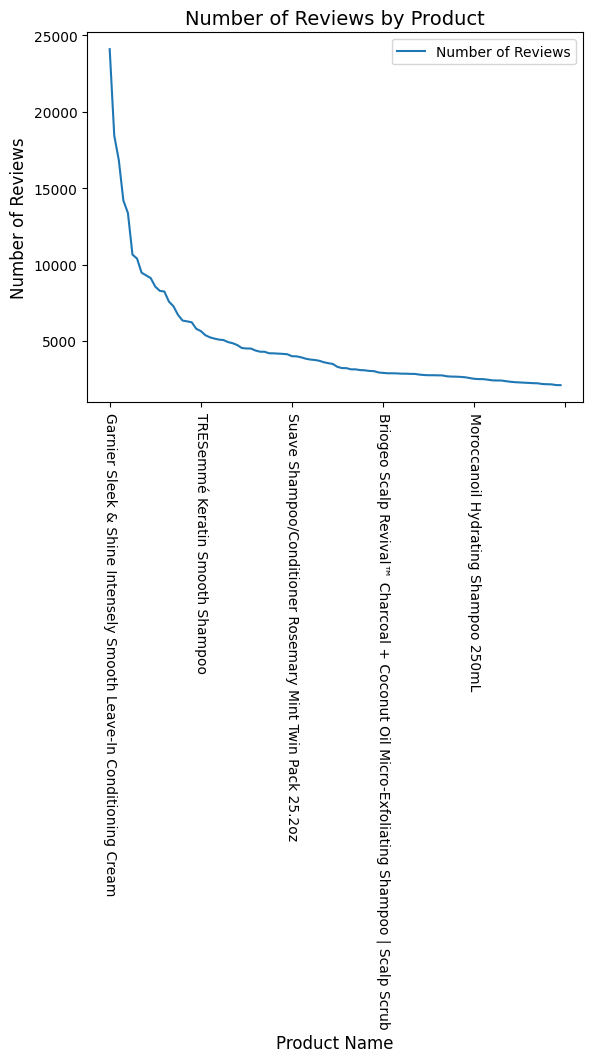

In [ ]:
#long tail
plt.figure(figsize=(15, 6))
df_plot = df[['product_name','Average Rating','Number of Reviews']].drop_duplicates()
df_plot.plot(x='product_name', y='Number of Reviews', marker='None', linestyle='-')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Number of Reviews by Product', fontsize=14)
plt.xticks(rotation=270)

plt.show()

<ipython-input-28-8ca66e7f8d98>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjusts the plot to fit within the figure area


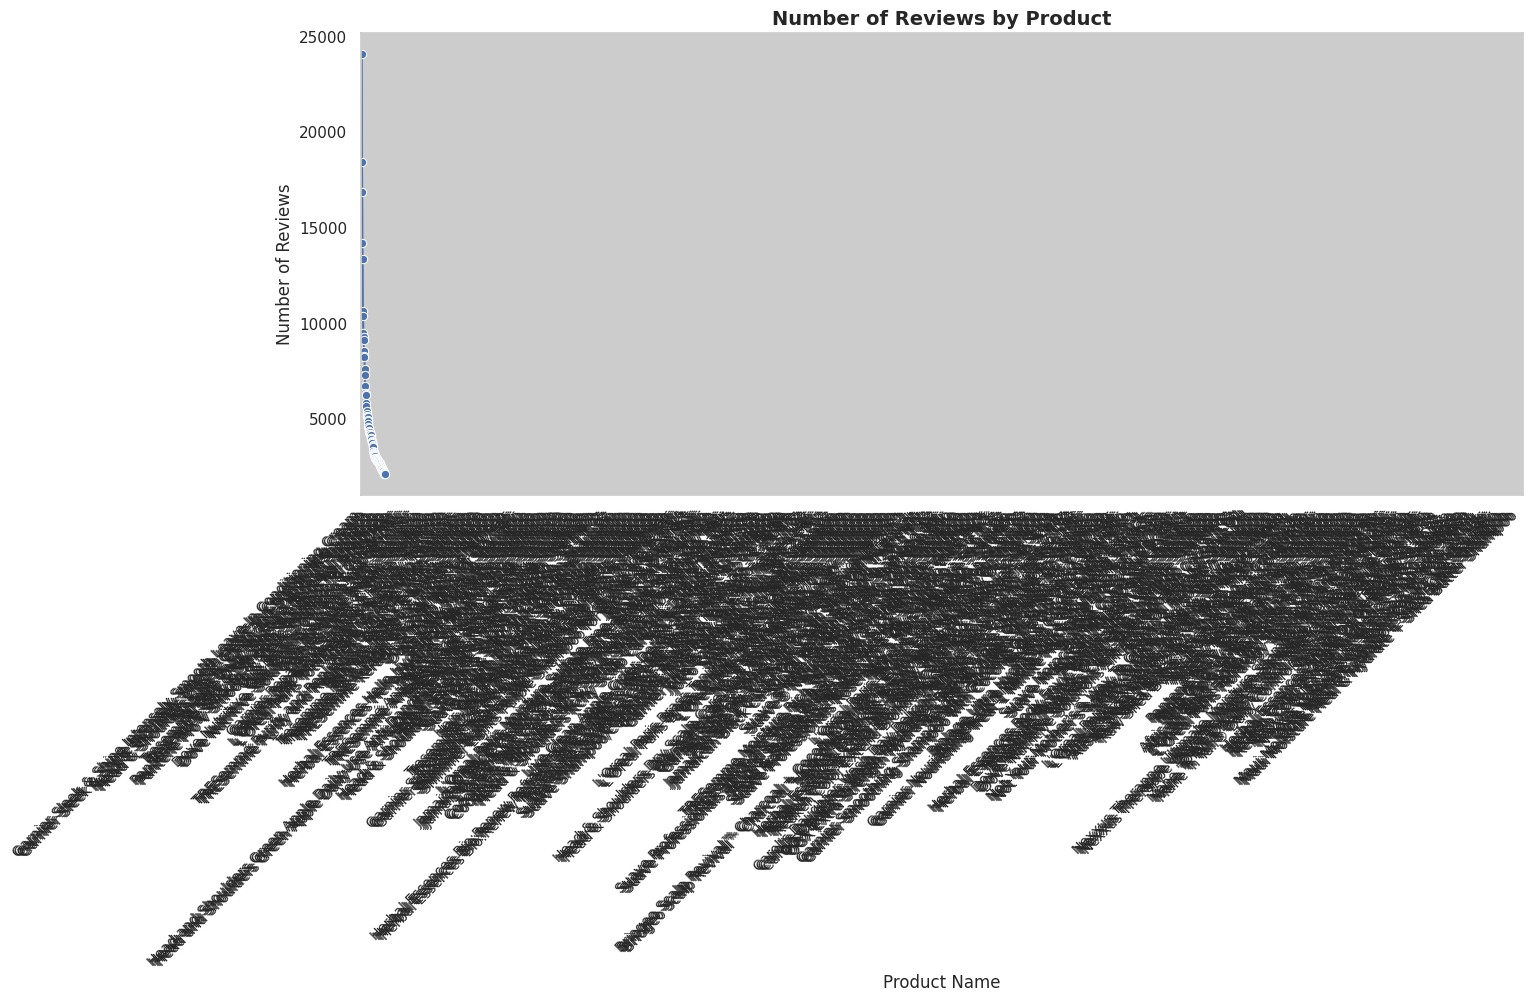

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Long tail plot
plt.figure(figsize=(15, 6))
df_plot = df[['product_name', 'Average Rating', 'Number of Reviews']].drop_duplicates()
sns.lineplot(data=df_plot, x='product_name', y='Number of Reviews', marker='o', linestyle='-', color='b')

plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Number of Reviews by Product', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to fit within the figure area
ticks = np.arange(len(df['product_name']))
plt.xticks(ticks, df['product_name'], rotation=45, ha='right', fontsize=10)
# Show only every 10th tick
plt.gca().set_xticklabels([name if i % 10 == 0 else '' for i, name in enumerate(df['product_name'])], rotation=45, ha='right', fontsize=10)
# Show grid lines
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Get all words into a single list - then going through this list to identify some important attributes
all_words = [word for words_list in df['filtered_words'] for word in words_list] # This is the list of all the words - this will be our main vector
# Get the overall word count
word_count = Counter(all_words)
word_count_df = pd.DataFrame(word_count.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
word_count_df[:5]
csv_file_path = 'unique_word_count_reviews.csv'
# The outout will have the number of times each word had appeared in the product reviews - multiple occuarances within a review is counted as one
word_count_df.to_csv(csv_file_path, index=False)
from google.colab import files
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# A list of all reviews for all products
list_reviews = df['filtered_words'].tolist()
list_reviews[:2]

[['scent',
  'great',
  'unbelievable',
  'works',
  'great',
  'unbelievable',
  'bottle',
  'good',
  'looking',
  'texture',
  'feels',
  'silky',
  'smooth'],
 ['leaves',
  'hair',
  'super',
  'soft',
  'texture',
  'makes',
  'frizz_free',
  'best',
  'looking',
  'without',
  'doubt',
  'best',
  'option',
  'test',
  'hair']]

In [ ]:
#get a list of top attributes from the count file and look at the lift values between attributes
from google.colab import files
uploaded = files.upload()

Saving attributes.csv to attributes.csv


In [ ]:
atr = pd.read_csv("attributes.csv",encoding='cp1252')
atr['attributes'].tolist()

['scent',
 'soft',
 'dry',
 'packaging',
 'smooth',
 'color',
 'texture',
 'shiny',
 'silky',
 'dandruff',
 'affordable',
 'oil',
 'lather',
 'curly',
 'fizzy',
 'greasy ',
 'repair',
 'quality',
 'moisturized',
 'soft',
 'herbal',
 'hydration',
 'wavy',
 'keratin',
 'nourishing',
 'stregthen',
 'fruity',
 'volume',
 'tangles']

In [ ]:
#Calculate the lift between attributes
#find the co-mentions between attributes - do not have to look at the products for this
def co_mentions(s1,s2,list_reviews):
  c=0;
  for i in list_reviews:
    if s1 in i and s2 in i:
      c=c+1
  return c

In [ ]:
def create_lift_matrix(l1,l2,list_reviews,word_count):
  n_tweets = len(list_reviews)
  lift_matrix = pd.DataFrame(np.zeros((len(l1), len(l2))), index=l1, columns=l2)
  for i in range(len(l1)):
        for j in range(len(l2)):
            if l1[i] == l2[j]:
                lift_matrix.loc[l1[i], l2[j]] = np.nan  # Use NaN for same attribute comparison
            else:
                # Make sure that word counts are not zero to avoid division by zero
                if word_count.get(l1[i], 0) > 0 and word_count.get(l2[j], 0) > 0:
                    co_men = co_mentions(l1[i], l2[j], list_reviews)
                    #print("Co mentions of ", l1[i],",",l2[j],"=",co_men)
                    lift_value = (n_tweets * co_men) / (word_count[l1[i]] * word_count[l2[j]])
                    lift_matrix.loc[l1[i], l2[j]] = lift_value
                else:
                    lift_matrix.loc[l1[i], l2[j]] = 0  # Assign 0 if word counts are zero or missing

  return lift_matrix

In [ ]:
attribute_lift = create_lift_matrix(atr['attributes'].tolist(),atr['attributes'].tolist(),list_reviews,word_count)
attribute_lift

,scent,soft,dry,packaging,smooth,color,texture,shiny,silky,dandruff,...,soft,herbal,hydration,wavy,keratin,nourishing,stregthen,fruity,volume,tangles
scent,NaN,1.013365,0.776310,1.761650,1.046555,0.571858,1.499724,0.901197,0.892015,0.856109,...,1.013365,1.069748,1.114513,0.793476,0.730645,1.720652,0.0,2.451929,0.885630,0.967867
soft,1.013365,NaN,0.792477,1.033912,1.037000,0.599365,1.058003,2.044670,1.621941,0.389045,...,NaN,1.204935,1.189287,1.051876,0.942685,1.598930,0.0,1.308216,0.695791,1.962323
dry,0.776310,0.792477,NaN,0.502270,0.795698,0.554535,0.653473,0.528161,0.810074,0.923046,...,0.792477,0.790739,1.951174,1.380587,1.148897,1.430861,0.0,1.201923,0.382966,1.287775
packaging,1.761650,1.033912,0.502270,NaN,1.085657,0.440512,2.804430,1.010024,1.057189,0.646886,...,1.033912,0.482328,0.380851,0.594436,0.539072,1.512824,0.0,2.513615,0.646886,0.000000
smooth,1.046555,1.037000,0.795698,1.085657,NaN,0.467318,1.200907,1.593187,3.659083,0.711667,...,1.037000,1.604621,1.018146,1.412562,2.690100,1.659200,0.0,1.493280,0.469700,0.622200
color,0.571858,0.599365,0.554535,0.440512,0.467318,NaN,0.458352,0.586178,0.437257,0.035064,...,0.599365,0.282358,1.114765,0.579979,0.473365,1.532802,0.0,1.532802,0.262981,0.766401
texture,1.499724,1.058003,0.653473,2.804430,1.200907,0.458352,NaN,0.807140,1.460876,0.698014,...,1.058003,0.255493,1.386963,0.918394,1.142204,2.157497,0.0,2.773925,0.713878,1.386963
shiny,0.901197,2.044670,0.528161,1.010024,1.593187,0.586178,0.807140,NaN,1.526445,0.582181,...,2.044670,1.250156,1.233920,0.802465,0.873271,1.508125,0.0,2.714625,0.523963,0.848320
silky,0.892015,1.621941,0.810074,1.057189,3.659083,0.437257,1.460876,1.526445,NaN,0.512222,...,1.621941,2.062366,1.628466,1.059053,1.382998,1.741553,0.0,0.895656,0.845166,0.000000
dandruff,0.856109,0.389045,0.923046,0.646886,0.711667,0.035064,0.698014,0.582181,0.512222,NaN,...,0.389045,0.000000,0.000000,0.220809,0.000000,0.518726,0.0,0.466853,0.320390,0.000000


In [ ]:
#output the beer attribute lift matrix to understand and pick 3 attributes with good lift
csv_file_path = 'attribute_lift.csv'
# The outout will have the number of times each word had appeared in the product reviews - multiple occuarances within a review is counted as one
attribute_lift.to_csv(csv_file_path, index=False)
from google.colab import files
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#ask the user to select any 3 attributes of his/her choice
user_input = []
print("These are the general things people are using to talk about while discussing shampoos")
print(atr['attributes'].to_list())
print("Enter three important attributes from the above list you are looking for in your shampoo and we will help you find your perfect shampoo")
for i in range(3):
  attribute = input("Enter the attribute and hit enter to proceed ")
  user_input.append(attribute)
user_input

These are the general things people are using to talk about while discussing shampoos
['scent', 'soft', 'dry', 'packaging', 'smooth', 'color', 'texture', 'shiny', 'silky', 'dandruff', 'affordable', 'oil', 'lather', 'curly', 'fizzy', 'greasy ', 'repair', 'quality', 'moisturized', 'soft', 'herbal', 'hydration', 'wavy', 'keratin', 'nourishing', 'stregthen', 'fruity', 'volume', 'tangles']
Enter three important attributes from the above list you are looking for in your shampoo and we will help you find your perfect shampoo
Enter the attribute and hit enter to proceed curly
Enter the attribute and hit enter to proceed oil
Enter the attribute and hit enter to proceed greasy


['curly', 'oil', 'greasy']

In [ ]:
#add this to the main dataframe
new_row=pd.DataFrame({'product_name': 'attributes' , 'product_review': ' '.join(user_input) ,'user_rating':5, 'filtered_words': [user_input]})
#df= pd.concat([new_row, df], ignore_index=True)
#df
new_row

,product_name,product_review,user_rating,filtered_words
0,attributes,curly oil greasy,5,"[curly, oil, greasy]"


In [ ]:
df_new= pd.concat([new_row, df], ignore_index=True)

In [ ]:
list_reviews_new = df_new['filtered_words'].tolist()
list_reviews_str = [' '.join(words_list) for words_list in list_reviews_new]
print(list_reviews_str)

['curly oil greasy', 'scent great unbelievable works great unbelievable bottle good looking texture feels silky smooth', 'leaves hair super soft texture makes frizz_free best looking without doubt best option test hair', 'love leaves shine hair aroma leaves super rich love leaves soft without frizz love recommend damaged hair', 'using since middle school price always affordable smell amazing effective hair', 'used years awesome scent smells clean refreshing smooth creamy perfect wavy curly hair value definitely good price', 'works really well texture amazing good size price scent smells amazing packaging cute good traveling', 'smells great works well curly hair usually wet hair little put product put much cause weigh curls like take another bottle pour half mix water helps keep hair feeling heavy', 'great texture scent love effectiveness hair well packaged last long money highly recommend everyone hair problems', 'great washing hair hair left perfect shiny soft recommend everyone ingre

# Task C : Cosine Similarity between the first row - with just the attributes and the rest of the rows (normlized)

In [ ]:
vectorizer = CountVectorizer()
# Fit and transform the documents
word_matrix = vectorizer.fit_transform(list_reviews_str)
# Convert the matrix to an array
word_matrix_array = word_matrix.toarray()
# Get feature (word) names
feature_names = vectorizer.get_feature_names_out()
# Convert to a DataFrame
df_word_matrix = pd.DataFrame(word_matrix_array, columns=feature_names)
df_word_matrix_normalized = pd.DataFrame(normalize(df_word_matrix, norm='l1', axis=1), columns=feature_names)
df_word_matrix_normalized.head()

,00,000,0498,10,100,1000,100ml,10_12,10days,10x,...,качеству,мαgιc,соответствует,цена,єνєяу,ѕєєкєя,ﾟﾟ,𝙒𝙧𝙞𝙩𝙚,𝙝𝙚𝙧𝙚,𝙨𝙤𝙢𝙚𝙩𝙝𝙞𝙣𝙜
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#cosine similarity
# Calculate cosine similarity of the first row with all rows
cosine_similarities = cosine_similarity(df_word_matrix_normalized.iloc[0:1], df_word_matrix_normalized)

# Convert the result to a DataFrame for better visualization
cosine_similarity_df = pd.DataFrame(cosine_similarities.flatten(), columns=['Cosine Similarity'])

# Display the result
df_new['cosine_sim'] = cosine_similarity_df['Cosine Similarity']
df_new.head()

,product_name,product_review,user_rating,filtered_words,Product Description,Average Rating,Number of Reviews,price_per_qty,cosine_sim
0,attributes,curly oil greasy,5,"[curly, oil, greasy]",NaN,NaN,NaN,NaN,1.0
1,Garnier Sleek & Shine Intensely Smooth Leave-I...,the scent is just great it's just unbelievable...,5 / 5,"[scent, great, unbelievable, works, great, unb...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0
2,Garnier Sleek & Shine Intensely Smooth Leave-I...,"It leaves my hair with a super soft texture, i...",5 / 5,"[leaves, hair, super, soft, texture, makes, fr...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0
3,Garnier Sleek & Shine Intensely Smooth Leave-I...,I love it because it leaves a shine in the hai...,5 / 5,"[love, leaves, shine, hair, aroma, leaves, sup...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0
4,Garnier Sleek & Shine Intensely Smooth Leave-I...,I have been using this since I was in middle s...,5 / 5,"[using, since, middle, school, price, always, ...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0


In [ ]:
import copy
from copy import deepcopy
df_similarity = copy.deepcopy(df_new.drop(columns = ['user_rating','filtered_words']))
df_similarity.head()

,product_name,product_review,Product Description,Average Rating,Number of Reviews,price_per_qty,cosine_sim
0,attributes,curly oil greasy,NaN,NaN,NaN,NaN,1.0
1,Garnier Sleek & Shine Intensely Smooth Leave-I...,the scent is just great it's just unbelievable...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0
2,Garnier Sleek & Shine Intensely Smooth Leave-I...,"It leaves my hair with a super soft texture, i...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0
3,Garnier Sleek & Shine Intensely Smooth Leave-I...,I love it because it leaves a shine in the hai...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0
4,Garnier Sleek & Shine Intensely Smooth Leave-I...,I have been using this since I was in middle s...,Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0


# Task D : Vader similarity

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#sentiment analysis using vader
analyzer = SentimentIntensityAnalyzer()
# Function to calculate sentiment using VADER
def vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the VADER sentiment function to the DataFrame
df_new['vader_sentiment'] = df_new['product_review'].apply(vader_sentiment)

# Display the DataFrame with VADER sentiment scores
df_new.head()

,product_name,product_review,user_rating,filtered_words,Product Description,Average Rating,Number of Reviews,price_per_qty,cosine_sim,vader_sentiment
0,attributes,curly oil greasy,5,"[curly, oil, greasy]",NaN,NaN,NaN,NaN,1.0,0.0000
1,Garnier Sleek & Shine Intensely Smooth Leave-I...,the scent is just great it's just unbelievable...,5 / 5,"[scent, great, unbelievable, works, great, unb...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9386
2,Garnier Sleek & Shine Intensely Smooth Leave-I...,"It leaves my hair with a super soft texture, i...",5 / 5,"[leaves, hair, super, soft, texture, makes, fr...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9546
3,Garnier Sleek & Shine Intensely Smooth Leave-I...,I love it because it leaves a shine in the hai...,5 / 5,"[love, leaves, shine, hair, aroma, leaves, sup...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9206
4,Garnier Sleek & Shine Intensely Smooth Leave-I...,I have been using this since I was in middle s...,5 / 5,"[using, since, middle, school, price, always, ...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.8306


# Task E : Overall Evaluation Score

In [ ]:
#combine similarity and sentiment scores to get the final score per review - then avergae it out by grouping at a product level
df_new['overall_score']=df_new['cosine_sim']*df_new['vader_sentiment']
df_new.head()

,product_name,product_review,user_rating,filtered_words,Product Description,Average Rating,Number of Reviews,price_per_qty,cosine_sim,vader_sentiment,overall_score
0,attributes,curly oil greasy,5,"[curly, oil, greasy]",NaN,NaN,NaN,NaN,1.0,0.0000,0.0
1,Garnier Sleek & Shine Intensely Smooth Leave-I...,the scent is just great it's just unbelievable...,5 / 5,"[scent, great, unbelievable, works, great, unb...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9386,0.0
2,Garnier Sleek & Shine Intensely Smooth Leave-I...,"It leaves my hair with a super soft texture, i...",5 / 5,"[leaves, hair, super, soft, texture, makes, fr...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9546,0.0
3,Garnier Sleek & Shine Intensely Smooth Leave-I...,I love it because it leaves a shine in the hai...,5 / 5,"[love, leaves, shine, hair, aroma, leaves, sup...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9206,0.0
4,Garnier Sleek & Shine Intensely Smooth Leave-I...,I have been using this since I was in middle s...,5 / 5,"[using, since, middle, school, price, always, ...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.8306,0.0


In [ ]:
average_scores = df_new.groupby('product_name')[['overall_score','vader_sentiment','cosine_sim']].mean().sort_values( by = 'overall_score', ascending=False)
average_scores

,overall_score,vader_sentiment,cosine_sim
product_name,,,
Garnier Sleek & Shine Moroccan Sleek Oil Treatment,0.039798,0.761654,0.066654
Pantene Curl Perfection Shampoo,0.038565,0.801788,0.049593
Tresemme Flawless Curls Shampoo with Coconut Oil,0.033154,0.827450,0.045922
Jamaican Black Castor Oil Bentonite Clay Shampoo Bar,0.031963,0.768944,0.039572
Garnier Sleek & Shine Intensely Smooth Leave-In Conditioning Cream,0.031104,0.834972,0.034494
...,...,...,...
L'Oreal Paris Brass Toning Purple Sulfate Free Shampoo,0.000000,0.836746,0.000000
"Head and Shoulders Green Apple Daily-Use Anti-Dandruff Paraben Free Shampoo, 32.1 fl oz",0.000000,0.805388,0.000000
Biolage ColorLast Shampoo,0.000000,0.825828,0.000000


# Beer Recommendations based on Vader sentiment and Cosine similarity

# Task F : Spacy Similarity & Vader sentiment : Comparision with cosine + vader

In [ ]:
#spacy similarity
nlp = spacy.load("en_core_web_md")
# Get the first review
first_review = df_new['product_review'].iloc[0]
# Process the first review
first_doc = nlp(first_review)
# Calculate similarity with all other reviews
similarity_scores = []
# Calculate similarity with all other reviews
for review in df_new['product_review']:
    doc = nlp(review)
    similarity = first_doc.similarity(doc)
    #print(similarity)
    similarity_scores.append(similarity)
# Add similarity scores to the DataFrame
df_new['spacy_similarity'] = similarity_scores

# Display the DataFrame with similarity scores
df_new.head()

,product_name,product_review,user_rating,filtered_words,Product Description,Average Rating,Number of Reviews,price_per_qty,cosine_sim,vader_sentiment,overall_score,spacy_similarity
0,attributes,curly oil greasy,5,"[curly, oil, greasy]",NaN,NaN,NaN,NaN,1.0,0.0000,0.0,1.000000
1,Garnier Sleek & Shine Intensely Smooth Leave-I...,the scent is just great it's just unbelievable...,5 / 5,"[scent, great, unbelievable, works, great, unb...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9386,0.0,0.356010
2,Garnier Sleek & Shine Intensely Smooth Leave-I...,"It leaves my hair with a super soft texture, i...",5 / 5,"[leaves, hair, super, soft, texture, makes, fr...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9546,0.0,0.362098
3,Garnier Sleek & Shine Intensely Smooth Leave-I...,I love it because it leaves a shine in the hai...,5 / 5,"[love, leaves, shine, hair, aroma, leaves, sup...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9206,0.0,0.397272
4,Garnier Sleek & Shine Intensely Smooth Leave-I...,I have been using this since I was in middle s...,5 / 5,"[using, since, middle, school, price, always, ...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.8306,0.0,0.293171


In [ ]:
#calculating the overall score based on the vader sentiment and the spacy similarity
df_new['spacy_overall_score']= df_new['spacy_similarity']*df_new['vader_sentiment']
df_new.head()

,product_name,product_review,user_rating,filtered_words,Product Description,Average Rating,Number of Reviews,price_per_qty,cosine_sim,vader_sentiment,overall_score,spacy_similarity,spacy_overall_score
0,attributes,curly oil greasy,5,"[curly, oil, greasy]",NaN,NaN,NaN,NaN,1.0,0.0000,0.0,1.000000,0.000000
1,Garnier Sleek & Shine Intensely Smooth Leave-I...,the scent is just great it's just unbelievable...,5 / 5,"[scent, great, unbelievable, works, great, unb...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9386,0.0,0.356010,0.334151
2,Garnier Sleek & Shine Intensely Smooth Leave-I...,"It leaves my hair with a super soft texture, i...",5 / 5,"[leaves, hair, super, soft, texture, makes, fr...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9546,0.0,0.362098,0.345659
3,Garnier Sleek & Shine Intensely Smooth Leave-I...,I love it because it leaves a shine in the hai...,5 / 5,"[love, leaves, shine, hair, aroma, leaves, sup...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.9206,0.0,0.397272,0.365728
4,Garnier Sleek & Shine Intensely Smooth Leave-I...,I have been using this since I was in middle s...,5 / 5,"[using, since, middle, school, price, always, ...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.0,0.8306,0.0,0.293171,0.243508


In [ ]:
average_scores_spacy = df_new.groupby('product_name')['spacy_overall_score'].mean().sort_values(ascending=False)
average_scores_spacy.head()

,spacy_overall_score
product_name,
Herbal Essences Smooth Collection Shampoo,0.323635
Pureology Hydrate Shampoo,0.321914
Garnier Smoothing Shampoo with Coconut Oil & Cocoa Butter Extracts,0.316074
Garnier Smoothing Treat 1 Minute Hair Mask + Avocado Extract,0.313362
Garnier Sleek & Shine Shampoo,0.309465


# Task G : Receommendation just on the basis of the average ratings

In [ ]:
# Get the top recommendations just based on average rating
average_rating = df_new.groupby('product_name')['Average Rating'].mean().sort_values(ascending=False)
average_rating.head()

,Average Rating
product_name,
No. 4 Bond Maintenance™ Shampoo,4.74
Pureology Strength Cure Shampoo,4.69
Tea Tree Special Shampoo,4.67
Redken Color Extend Blondage Color Depositing Purple Shampoo,4.67
Pureology Hydrate Shampoo,4.66


In [ ]:
# Top 3 beers for the given attributes beased on cosine similarity and vader sentiment analysis
average_scores[:3]

,overall_score,vader_sentiment,cosine_sim
product_name,,,
Garnier Sleek & Shine Moroccan Sleek Oil Treatment,0.039798,0.761654,0.066654
Pantene Curl Perfection Shampoo,0.038565,0.801788,0.049593
Tresemme Flawless Curls Shampoo with Coconut Oil,0.033154,0.827450,0.045922


In [ ]:
# Top 3 Beers based on spacy similarity and vader sentiment
average_scores_spacy[:3]

,spacy_overall_score
product_name,
Herbal Essences Smooth Collection Shampoo,0.323635
Pureology Hydrate Shampoo,0.321914
Garnier Smoothing Shampoo with Coconut Oil & Cocoa Butter Extracts,0.316074


In [ ]:
#on the basis of average ratings
average_rating[1:4]

,Average Rating
product_name,
Pureology Strength Cure Shampoo,4.69
Tea Tree Special Shampoo,4.67
Redken Color Extend Blondage Color Depositing Purple Shampoo,4.67


In [ ]:
shampoos = reviews['product_name'].unique()

In [ ]:
#lift matrix with all the initial attributes
n= len(df_new)
print("total length =",n)
sh_oc = {}
new_at = atr['attributes'].to_list()
at_oc = {}
for i in shampoos:
  sh_oc[i]=len(df_new[df_new['product_name']==i])
  #print(i," ",beer_oc[i])
for i in new_at:
  at_oc[i]= word_count[i]
  #print(i," ",word_count[i])
# Function to count reviews containing the word
def count_reviews_containing_word(df, word):
    count = df['product_review'].str.contains(fr'\b{word}\b', case=False, na=False).sum()
    return count
shampoo_lift = pd.DataFrame(np.zeros((len(sh_oc), len(at_oc))), index=sh_oc, columns=at_oc)
for i in shampoos:
  temp_df = df_new[df_new['product_name']==i]
  for j in new_at:
    c=count_reviews_containing_word(temp_df,j)
    #print("Co mentions of ", i,",",i,"=",c)
    lift_value = (n * c) / ( sh_oc[i]* at_oc[j])
    if lift_value==0 or np.isnan(lift_value):
      shampoo_lift.loc[i, j] = 0.001
    else:
      if lift_value <= 0.05:
        shampoo_lift.loc[i, j] = 0.05
      else:
        shampoo_lift.loc[i, j] = lift_value
    c=0
shampoo_lift

total length = 5001


<ipython-input-55-6f0197b4e050>:23: RuntimeWarning: divide by zero encountered in scalar divide
  lift_value = (n * c) / ( sh_oc[i]* at_oc[j])
<ipython-input-55-6f0197b4e050>:23: RuntimeWarning: invalid value encountered in scalar divide
  lift_value = (n * c) / ( sh_oc[i]* at_oc[j])


,scent,soft,dry,packaging,smooth,color,texture,shiny,silky,dandruff,...,moisturized,herbal,hydration,wavy,keratin,nourishing,stregthen,fruity,volume,tangles
Garnier Sleek & Shine Intensely Smooth Leave-In Conditioning Cream,1.355285,1.282308,0.360649,1.319912,1.742509,0.214635,2.913204,0.950309,0.313542,0.001000,...,0.001000,0.001000,1.298961,5.406486,0.001000,0.001000,0.001,2.857714,0.001000,0.001000
Head & Shoulders Classic Clean Anti-Dandruff Shampoo,0.813171,0.183187,1.562812,1.759883,0.522753,0.001000,0.971068,0.237577,0.313542,12.093922,...,1.163023,0.001000,0.001000,1.351622,0.001000,4.762857,0.001,0.001000,0.001000,0.001000
Pantene Daily Moisture Renewal Shampoo,1.535989,1.282308,1.202163,1.906540,1.568258,0.214635,1.165282,0.475154,1.881254,0.001000,...,1.163023,0.001000,3.896883,1.351622,0.001000,0.001000,0.001,0.001000,0.980588,0.001000
Tresemme Silky & Smooth Shampoo for Frizzy Hair,0.722818,1.373901,0.360649,1.466569,3.136516,0.001000,1.747922,1.187886,4.076050,0.653725,...,0.001000,0.001000,1.298961,1.351622,1.470882,0.001000,0.001,2.857714,0.490294,0.001000
Pantene Pro-V Smooth & Sleek Shampoo & Conditioner,0.993875,1.190714,0.480865,2.199853,2.788014,0.001000,2.330563,2.138195,2.194796,0.326863,...,0.001000,0.001000,1.298961,1.351622,0.001000,0.001000,0.001,0.001000,0.001000,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Herbal Essences Argan Oil Of Morocco Shampoo,1.174580,1.831868,0.721298,1.173255,0.871254,0.001000,0.582641,1.425463,2.194796,0.326863,...,0.001000,10.528421,1.298961,0.001000,0.001000,0.001000,0.001,0.001000,0.001000,0.001000
Redken Color Extend Magnetics Shampoo 300mL,0.903523,1.007527,0.240433,0.146657,0.522753,6.224421,0.194214,0.475154,0.001000,0.001000,...,1.163023,0.001000,1.298961,0.001000,0.001000,0.001000,0.001,0.001000,0.490294,0.001000
Nexxus Color Assure Shampoo for Colored Hair,0.722818,1.007527,1.081947,0.001000,0.522753,4.292704,0.001000,0.950309,0.627085,0.326863,...,1.163023,0.001000,0.001000,0.001000,0.001000,0.001000,0.001,0.001000,0.001000,0.001000
Dove Nutritive Solutions Color Care Shampoo,0.722818,0.915934,0.360649,1.173255,0.348502,2.360987,0.776854,0.950309,1.254169,0.001000,...,0.001000,0.001000,2.597922,0.001000,0.001000,0.001000,0.001,0.001000,0.001000,0.001000


In [ ]:
shampoo_lift.replace([np.inf, -np.inf], np.nan, inplace=True)
# Fill NaN values with a small value (e.g., 0.001)
shampoo_lift.fillna(0.001, inplace=True)
# Now, calculate cosine similarity between all rows
cosine_sim = cosine_similarity(shampoo_lift)
# Output the cosine similarity matrix
print(cosine_sim)

[[1.         0.14698594 0.48437705 ... 0.11492929 0.35323521 0.59028507]
 [0.14698594 1.         0.13160369 ... 0.12689319 0.12133971 0.1451525 ]
 [0.48437705 0.13160369 1.         ... 0.45765968 0.5652317  0.43987232]
 ...
 [0.11492929 0.12689319 0.45765968 ... 1.         0.5788896  0.19872994]
 [0.35323521 0.12133971 0.5652317  ... 0.5788896  1.         0.38257282]
 [0.59028507 0.1451525  0.43987232 ... 0.19872994 0.38257282 1.        ]]


In [ ]:
# Calculate cosine similarity between all rows
cosine_sim = cosine_similarity(shampoo_lift)

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=shampoo_lift.index, columns=shampoo_lift.index)

In [ ]:
reviews_df = df[['product_name', 'Number of Reviews']].drop_duplicates()
reviews_df['Ranking'] = reviews_df['Number of Reviews'].rank(ascending=False).astype(int)
reviews_df.sort_values(by = 'Ranking', ascending = True, inplace = True)
reviews_df

,product_name,Number of Reviews,Ranking
0,Garnier Sleek & Shine Intensely Smooth Leave-I...,24090,1
50,Head & Shoulders Classic Clean Anti-Dandruff S...,18437,2
100,Pantene Daily Moisture Renewal Shampoo,16833,3
150,Tresemme Silky & Smooth Shampoo for Frizzy Hair,14193,4
200,Pantene Pro-V Smooth & Sleek Shampoo & Conditi...,13372,5
...,...,...,...
4750,Herbal Essences Argan Oil Of Morocco Shampoo,2183,96
4800,Redken Color Extend Magnetics Shampoo 300mL,2170,97
4850,Nexxus Color Assure Shampoo for Colored Hair,2162,98
4900,Dove Nutritive Solutions Color Care Shampoo,2115,99


<ipython-input-60-8dde416a45e8>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(coord[0], coord[1], c=f'C{labels[i]}', s=100, cmap='viridis', edgecolor='k')


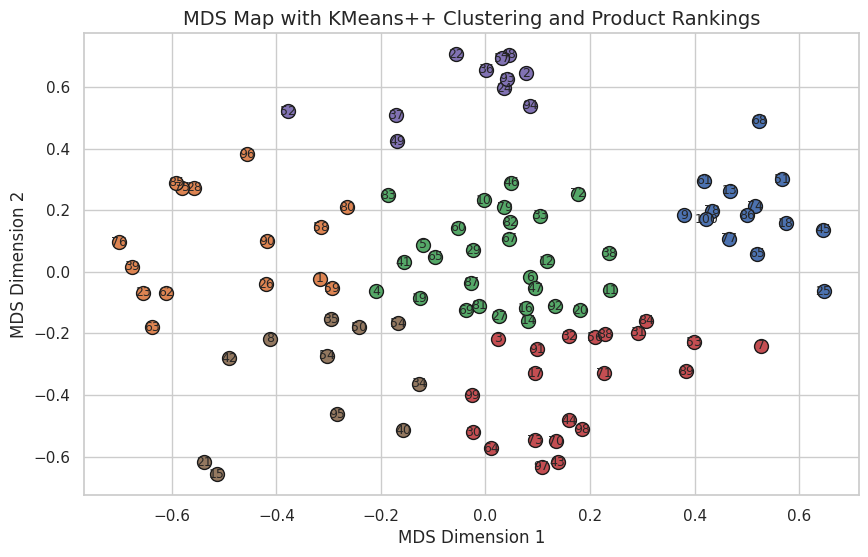

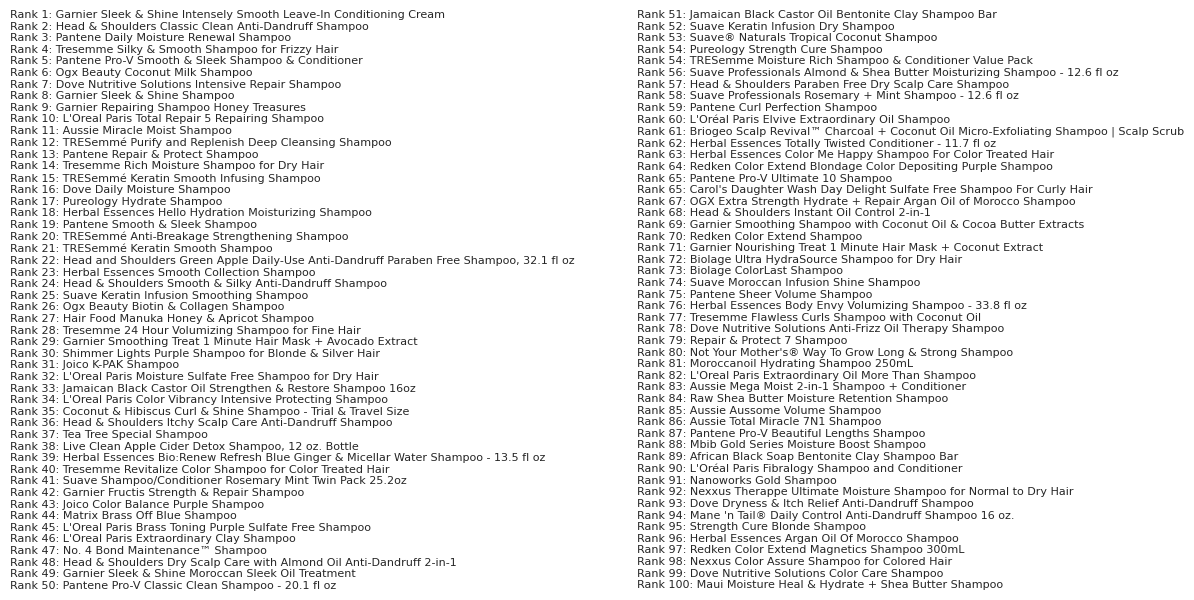

In [ ]:
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
rankings = reviews_df[['product_name', 'Ranking']].set_index('product_name').sort_values('Ranking')
# Step 3: Apply MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(1 - cosine_sim_df)

# Step 4: Apply KMeans++ clustering on MDS coordinates
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
labels = kmeans.fit_predict(mds_coords)

# Step 5: Plot the MDS map with KMeans clustering
plt.figure(figsize=(10, 6))

# Plot the MDS points with cluster colors and numerical labels based on ranking
for i, coord in enumerate(mds_coords):
    product_name = rankings.index[i]  # Get the product name based on the ranking
    ranking_value = rankings.loc[product_name, 'Ranking']  # Get the ranking value
    plt.scatter(coord[0], coord[1], c=f'C{labels[i]}', s=100, cmap='viridis', edgecolor='k')
    plt.text(coord[0], coord[1], str(ranking_value), fontsize=9, ha='center', va='center')

plt.title('MDS Map with KMeans++ Clustering and Product Rankings', fontsize=14)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)

# Step 6: Create a separate legend table with more spacing
fig_legend, ax_legend = plt.subplots(figsize=(12, 5))

# Splitting legend into columns with controlled text size and alignment
rows_per_col = 50  # Adjust this based on the number of shampoos
n_cols = (len(rankings.index) // rows_per_col) + 1
col_width = 0.7  # Adjust this value to add space between columns

# Display legend as multiple columns with increased spacing
legend_labels = [f"Rank {row['Ranking']}: {row.name}" for _, row in rankings.iterrows()]
for i in range(n_cols):
    col_data = legend_labels[i * rows_per_col:(i + 1) * rows_per_col]
    ax_legend.text(i * col_width, 1, "\n".join(col_data), fontsize=8, va='top', ha='left')

# Remove axes for the legend figure
ax_legend.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
#find the most similar substitute
cosine_sim_df.head()

,Garnier Sleek & Shine Intensely Smooth Leave-In Conditioning Cream,Head & Shoulders Classic Clean Anti-Dandruff Shampoo,Pantene Daily Moisture Renewal Shampoo,Tresemme Silky & Smooth Shampoo for Frizzy Hair,Pantene Pro-V Smooth & Sleek Shampoo & Conditioner,Ogx Beauty Coconut Milk Shampoo,Dove Nutritive Solutions Intensive Repair Shampoo,Garnier Sleek & Shine Shampoo,Garnier Repairing Shampoo Honey Treasures,L'Oreal Paris Total Repair 5 Repairing Shampoo,...,Nanoworks Gold Shampoo,Nexxus Therappe Ultimate Moisture Shampoo for Normal to Dry Hair,Dove Dryness & Itch Relief Anti-Dandruff Shampoo,Mane 'n Tail® Daily Control Anti-Dandruff Shampoo 16 oz.,Strength Cure Blonde Shampoo,Herbal Essences Argan Oil Of Morocco Shampoo,Redken Color Extend Magnetics Shampoo 300mL,Nexxus Color Assure Shampoo for Colored Hair,Dove Nutritive Solutions Color Care Shampoo,Maui Moisture Heal & Hydrate + Shea Butter Shampoo
Garnier Sleek & Shine Intensely Smooth Leave-In Conditioning Cream,1.000000,0.146986,0.484377,0.532992,0.694777,0.428173,0.186318,0.503838,0.406860,0.401370,...,0.401347,0.381945,0.195932,0.186915,0.301694,0.166785,0.139946,0.114929,0.353235,0.590285
Head & Shoulders Classic Clean Anti-Dandruff Shampoo,0.146986,1.000000,0.131604,0.231664,0.221412,0.362502,0.131354,0.212754,0.245846,0.186115,...,0.302059,0.341403,0.878131,0.804221,0.092189,0.098310,0.050141,0.126893,0.121340,0.145153
Pantene Daily Moisture Renewal Shampoo,0.484377,0.131604,1.000000,0.539607,0.677763,0.597029,0.182189,0.299871,0.340944,0.342047,...,0.659855,0.558339,0.339438,0.384612,0.300977,0.247902,0.356171,0.457660,0.565232,0.439872
Tresemme Silky & Smooth Shampoo for Frizzy Hair,0.532992,0.231664,0.539607,1.000000,0.760022,0.490415,0.274487,0.667816,0.431405,0.417703,...,0.344733,0.552644,0.296127,0.294842,0.692969,0.263039,0.186074,0.256326,0.535576,0.453164
Pantene Pro-V Smooth & Sleek Shampoo & Conditioner,0.694777,0.221412,0.677763,0.760022,1.000000,0.565823,0.310975,0.423067,0.491164,0.551989,...,0.429485,0.506280,0.362376,0.342570,0.277652,0.294171,0.206484,0.261156,0.621729,0.453652


In [ ]:
new = input('Enter the name of the shampoo you want to find  a substitute for ')

Enter the name of the shampoo you want to find  a substitute for Pantene Pro-V Smooth & Sleek Shampoo & Conditioner


In [ ]:
cosine_sim_df[new].sort_values(ascending=False)[:10]

,Pantene Pro-V Smooth & Sleek Shampoo & Conditioner
Pantene Pro-V Smooth & Sleek Shampoo & Conditioner,1.000000
Garnier Smoothing Treat 1 Minute Hair Mask + Avocado Extract,0.844227
Pantene Pro-V Beautiful Lengths Shampoo,0.799381
TRESemme Moisture Rich Shampoo & Conditioner Value Pack,0.781317
Tresemme Silky & Smooth Shampoo for Frizzy Hair,0.760022
Pantene Pro-V Ultimate 10 Shampoo,0.744553
Pantene Smooth & Sleek Shampoo,0.740792
Suave Shampoo/Conditioner Rosemary Mint Twin Pack 25.2oz,0.717970
Not Your Mother's® Way To Grow Long & Strong Shampoo,0.695417
Garnier Sleek & Shine Intensely Smooth Leave-In Conditioning Cream,0.694777


In [ ]:
!pip install gensim
!pip install nltk

In [ ]:
# Add cluster labels to the rankings DataFrame
rankings['Cluster'] = labels

grouped = rankings.groupby('Cluster')

In [ ]:
reviews_with_clusters = df_new.merge(rankings[['Cluster']], left_on='product_name', right_index=True)
reviews_with_clusters

,product_name,product_review,user_rating,filtered_words,Product Description,Average Rating,Number of Reviews,price_per_qty,cosine_sim,vader_sentiment,overall_score,spacy_similarity,spacy_overall_score,Cluster
1,Garnier Sleek & Shine Intensely Smooth Leave-I...,the scent is just great it's just unbelievable...,5 / 5,"[scent, great, unbelievable, works, great, unb...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.000000,0.9386,0.000000,0.356010,0.334151,1
2,Garnier Sleek & Shine Intensely Smooth Leave-I...,"It leaves my hair with a super soft texture, i...",5 / 5,"[leaves, hair, super, soft, texture, makes, fr...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.000000,0.9546,0.000000,0.362098,0.345659,1
3,Garnier Sleek & Shine Intensely Smooth Leave-I...,I love it because it leaves a shine in the hai...,5 / 5,"[love, leaves, shine, hair, aroma, leaves, sup...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.000000,0.9206,0.000000,0.397272,0.365728,1
4,Garnier Sleek & Shine Intensely Smooth Leave-I...,I have been using this since I was in middle s...,5 / 5,"[using, since, middle, school, price, always, ...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.000000,0.8306,0.000000,0.293171,0.243508,1
5,Garnier Sleek & Shine Intensely Smooth Leave-I...,I’ve used this for years! Awesome scent that s...,5 / 5,"[used, years, awesome, scent, smells, clean, r...",Leave-in conditioning cream for up to 3 day sl...,4.41,24090.0,12.99,0.140028,0.9571,0.134021,0.367171,0.351420,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,Maui Moisture Heal & Hydrate + Shea Butter Sha...,I really liked this shampoo. It smells great a...,4 / 5,"[really, liked, shampoo, smells, great, made, ...",Creamy shea butter is whipped into this hydrat...,4.44,2108.0,15.00,0.000000,0.9656,0.000000,0.373895,0.361033,0
4997,Maui Moisture Heal & Hydrate + Shea Butter Sha...,I have a love hate relationship with this sham...,3 / 5,"[love, hate, relationship, shampoo, feels, lik...",Creamy shea butter is whipped into this hydrat...,4.44,2108.0,15.00,0.000000,0.8173,0.000000,0.322225,0.263354,0
4998,Maui Moisture Heal & Hydrate + Shea Butter Sha...,"Never received this product from Influenster, ...",1 / 5,"[never, received, product, influenster, making...",Creamy shea butter is whipped into this hydrat...,4.44,2108.0,15.00,0.000000,-0.2498,-0.000000,0.262710,-0.065625,0
4999,Maui Moisture Heal & Hydrate + Shea Butter Sha...,I had a wonderful test experience with the Mau...,5 / 5,"[wonderful, test, experience, maui, products, ...",Creamy shea butter is whipped into this hydrat...,4.44,2108.0,15.00,0.000000,0.8934,0.000000,0.269990,0.241209,0


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
  from nltk.corpus import stopwords
  from nltk.tokenize import word_tokenize
  from gensim import corpora
  from gensim.models import LdaModel

  # Get reviews per cluster
  for cluster_id, group in grouped:

      cluster_reviews = reviews_with_clusters[reviews_with_clusters['Cluster']== cluster_id]['product_review']
      # Preprocess each review
      processed_reviews = [remove_stopwords_and_tokenize(review) for review in cluster_reviews]
      if cluster_reviews.empty:
        print(f"No reviews found for cluster {cluster_id}")

      # Create dictionary and corpus for LDA
      dictionary = corpora.Dictionary(processed_reviews)
      corpus = [dictionary.doc2bow(review) for review in processed_reviews]

      # Apply LDA
      lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10, random_state=42)

      # Display topics
      print(f"Cluster {cluster_id} Topics:")
      for idx, topic in lda_model.print_topics(-1):
          print(f"Topic {idx}: {topic}")
      print("\n")


Cluster 0 Topics:
Topic 0: 0.038*"hair" + 0.025*"shampoo" + 0.022*"scalp" + 0.014*"use" + 0.011*"product" + 0.010*"like" + 0.009*"dry" + 0.008*"smells" + 0.008*"feel" + 0.007*"conditioner"
Topic 1: 0.068*"hair" + 0.029*"shampoo" + 0.019*"love" + 0.018*"good" + 0.017*"product" + 0.014*"great" + 0.013*"really" + 0.013*"soft" + 0.011*"smells" + 0.011*"scent"


Cluster 1 Topics:
Topic 0: 0.053*"hair" + 0.029*"shampoo" + 0.013*"volume" + 0.011*"product" + 0.010*"really" + 0.009*"smells" + 0.009*"great" + 0.008*"scent" + 0.007*"good" + 0.007*"recommend"
Topic 1: 0.072*"hair" + 0.028*"shampoo" + 0.019*"good" + 0.018*"love" + 0.014*"great" + 0.014*"smells" + 0.014*"product" + 0.012*"soft" + 0.011*"scent" + 0.011*"like"


Cluster 2 Topics:
Topic 0: 0.064*"hair" + 0.041*"shampoo" + 0.011*"use" + 0.009*"scent" + 0.009*"great" + 0.009*"dry" + 0.007*"smooth" + 0.007*"without" + 0.007*"conditioner" + 0.006*"feeling"
Topic 1: 0.067*"hair" + 0.027*"good" + 0.023*"shampoo" + 0.020*"product" + 0.020*"lo

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
from sklearn.cluster import KMeans
import numpy as np


# Define a preprocessing function
def preprocess_reviews(reviews):
    unwanted_words = {'good','great','product','really','love','use','scalp', 'shampoo', 'hair'}
    processed = []
    for review in reviews:

        words = word_tokenize(review.lower())
        filtered = [word for word in words if word.isalnum() and word not in stopwords.words('english') and word not in unwanted_words]
        processed.append(filtered)
    return processed

# Get reviews for topic modeling
reviews = reviews_with_clusters['product_review'].tolist()
processed_reviews = preprocess_reviews(reviews)

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_reviews)
corpus = [dictionary.doc2bow(review) for review in processed_reviews]

# Apply LDA
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Get topic distributions for each review
topic_distributions = [lda_model.get_document_topics(bow) for bow in corpus]
topic_matrix = np.zeros((len(topic_distributions), num_topics))

for i, topics in enumerate(topic_distributions):
    for topic_id, prob in topics:
        topic_matrix[i, topic_id] = prob

# Perform KMeans clustering on topic distributions
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(topic_matrix)

# Add cluster labels to the original reviews DataFrame
reviews_with_clusters['Cluster'] = kmeans.labels_

# Print cluster topics
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id} reviews:")
    print(reviews_with_clusters[reviews_with_clusters['Cluster'] == cluster_id]['product_review'])


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
#Keep colab up while you are away
import time
while True:
    print("Keeping session alive...")
    time.sleep(60)